## Segue em anexo a série temporal de aceleração de um teste de impacto no pórtico triangular. 
Obtenha:
1) As séries temporais em velocidade e deslocamento (plote os 3 sinais); (0,25 ponto)
2) Pesquise sobre curva de "Zero-Crossing" para a estimativa da frequência natural amortecida; 

(0,5 ponto)
3) Pesquise sobre curva de "Log-Dec" para a estimativa da razão de amortecimento; 

(0,5 ponto)
4) A frequência natural amortecida, a frequência natural e a razão de amortecimento, utilizando cada uma das séries temporais; 

(0,5 ponto)
5) Compare e justifique os resultados obtidos no Item 04; (0,25 ponto)

In [2]:
import pandas as pd
from math import*
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from scipy import signal
from scipy import integrate
import scipy.signal.signaltools as signaltools
from scipy.signal import find_peaks
import sys
from numpy import NaN, Inf, arange, isscalar, asarray
import obspy
from obspy.signal.detrend import polynomial




## Importando o sinal

In [3]:
#Gerando a série temporal de g a partir da leitura do txt. uma lista de contendo o delta t e a data(respectiva medição)

f=open("Pórtico Triangular_Medição 01.txt")     # variável f recebe o arquivo txt
lines=f.readlines()                             # função readlines é todas as linhas de um arquivo txt em uma lista "lines". execute lines para entender 
serie_data=[]                                   #variável onde será armazenada a serie temporal
for i in lines:                                 # para cada i nesta lista lines faca:
    contador=0                                  #variável 0
    line=[]                                     # lista line SEM S NAO É A LISTA ANTERIOR
    for j in range(len(i)):                     #para cada j de 0 ao tamanho de i que é do tamanho de lines, logo todas as linhas
        if i[j]=='\t'or i[j]=='\n':             # se i[j] semelhante a tabular ou nova linha faca
            line.append(float(i[contador:j]))   # inclua na lista line como ponto flutuante, ou seja, ele inclui str por str ate o ultimo numero
            contador=j+1
    serie_data.append(line)
f.close()



In [4]:
#Medição

sample = 48000
Delta = 0.000488 #dt
T = sample * Delta #período
fs = 1.000 / Delta # sample rate, Hz 


In [5]:
# Passar separa o sinal(data) em uma lista no tempo e em data

lista_sample=[]
lista_data=[]
lista_data2=serie_data
for i in range(len(lista_data2)):
    lista_sample.append(i*Delta) # tempo 
    lista_data.append(lista_data2[i][1]*9.81) # medicao = lista_data

n= len(lista_data)
lista_data_min, lista_data_max = min(lista_data), max(lista_data)

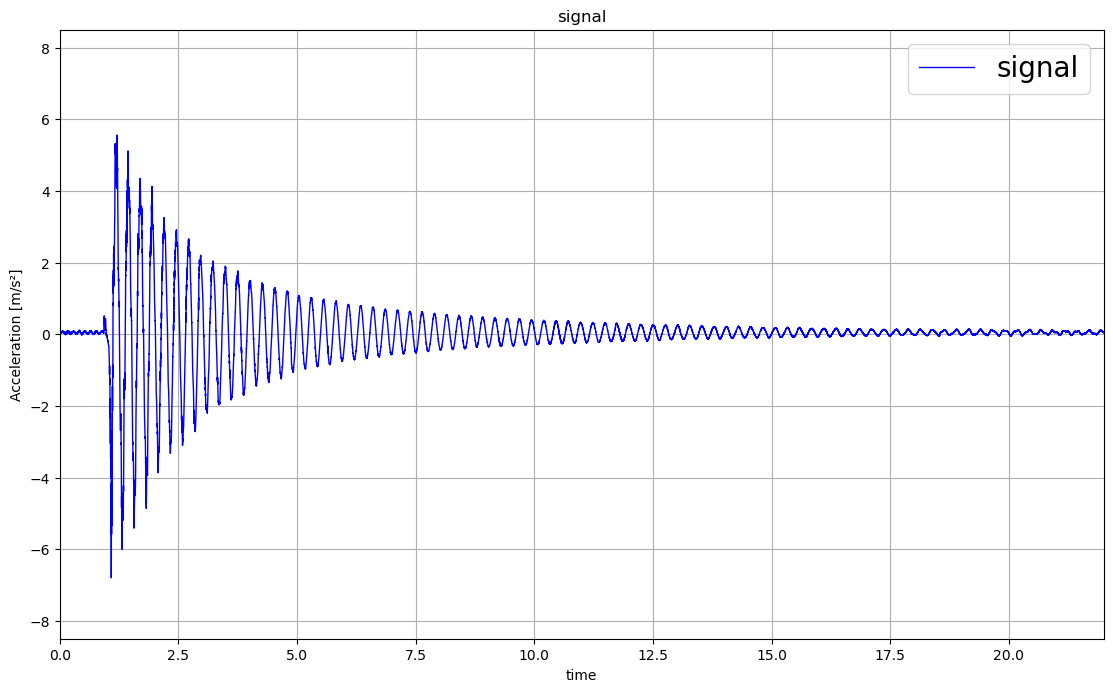

In [6]:
# figura 1: raw signal

fig, axs = plt.subplots( figsize=(12,7),  sharex=True)

axs.plot(lista_sample, lista_data, color='blue', lw=1, label='signal')



plt.subplots_adjust(left=0.10,
                        right=0.97,
                        top=0.94,
                        bottom=0.07,
                        hspace=0.2,
                        wspace=0.2)


axs.set_xlim(0.0, 22)
axs.set_ylim(-8.5, 8.5)

plt.legend(ncol=1)

axs.legend(fontsize=20)
axs.set_title('signal')
axs.set_ylabel('Acceleration [m/s²]')
axs.set_xlabel('time')

plt.grid(True)
plt.show()


In [7]:
# Filtro filtro passa banda so sinal cru

#Função que filtra a série de aceleração

sos=signal.butter(30,[0.1,30],'bandpass',analog=False,fs=fs,output='sos') # N (2**n), Wn(frequencia critica), btype=lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop, analog=False, output='sos', fs=1/delta
lista_data_clean = signal.sosfilt(sos, lista_data)  



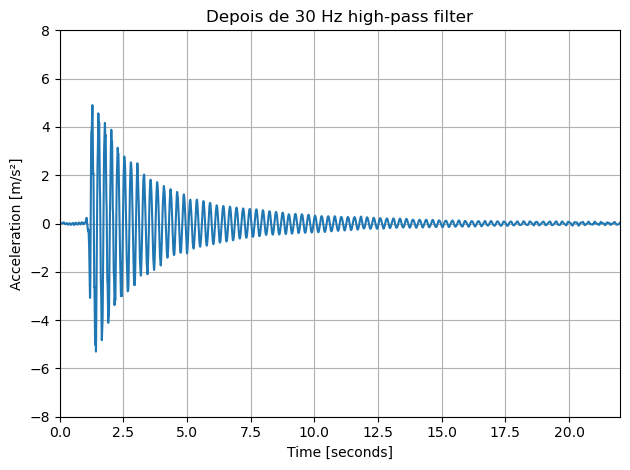

In [8]:
#figura 2: Após o filtro passa banda no sinal cru

fig, axs = plt.subplots( sharex=True)

axs.plot(lista_sample, lista_data_clean)
axs.set_title('Depois de 30 Hz high-pass filter')
axs.axis([0, 22, -8, 8])
axs.set_xlabel('Time [seconds]')
axs.set_ylabel('Acceleration [m/s²]')
plt.tight_layout()
plt.grid(True)
plt.show()

## Tratamento de sinal

#A análise de Fourier baseia-se na ideia de que qualquer série temporal pode ser decomposta em uma soma 
de integrais de ondas harmônicas de frequências diferentes. 

Portanto, teoricamente, podemos empregar um número de ondas harmônicas para gerar qualquer sinal.

A análise de Fourier é um método matemático para decompor um sinal em suas componentes de frequência. 
Isso significa que qualquer sinal pode ser representado como uma soma de ondas sinusoidais de diferentes frequências e amplitudes.


In [9]:
# Aplicando a transformada rapida de fourrier

n= len(lista_data_clean)

fhat= np.fft.fft(lista_data_clean,n)            # variavel recebe a fft
PSD= fhat*np.conj(fhat)/n                       #predictive sparse decomposition
freq= (1/(Delta*n))*np.arange(n)                #frequencia de aquisição
L= np.arange(1,np.floor(n/2),dtype='int')       #cria um array NumPy que contém uma sequência de números. 
                                                #A função floor() arredonda um número para baixo para o menor inteiro não negativo. cria um array que contém os índices de 1 a n/2.

#print(PSD)



C:\Users\Desktop\AppData\Local\Temp\ipykernel_17240\3936235166.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


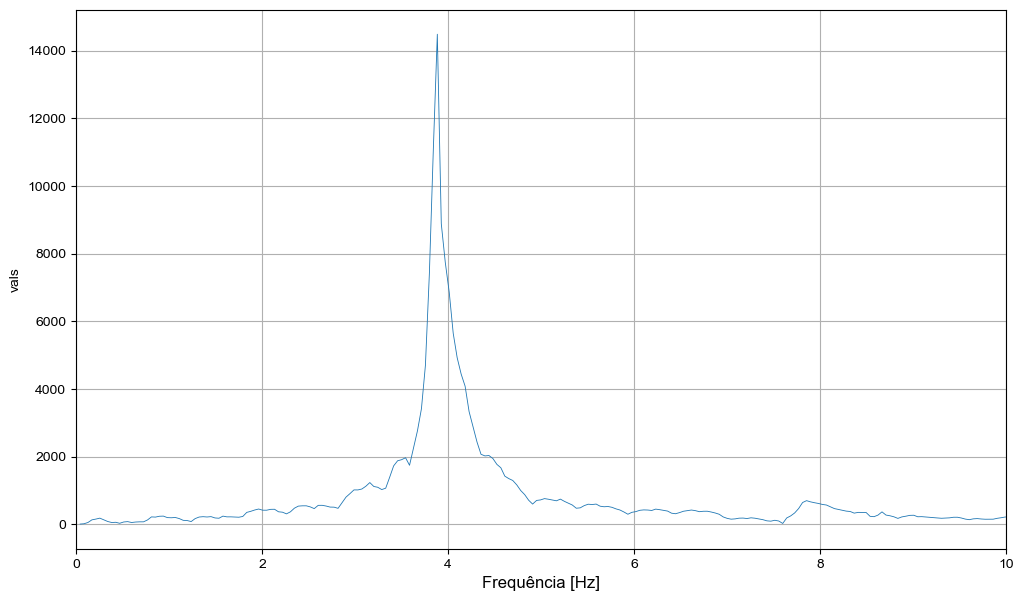

In [10]:
# Figura 3: Gráfico da fft sem tratamento

fig, axs = plt.subplots( figsize=(12,7), sharex=True)

plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 18})
plt.style.use('seaborn')

axs.set_xlim(0.0, 10)

axs.plot(freq[L],np.abs(fhat[L]), lw= 0.6)
axs.set_ylabel('vals')
plt.xlabel('Frequência [Hz]', fontsize=12)


plt.grid(True)
plt.show()

c:\Users\Desktop\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


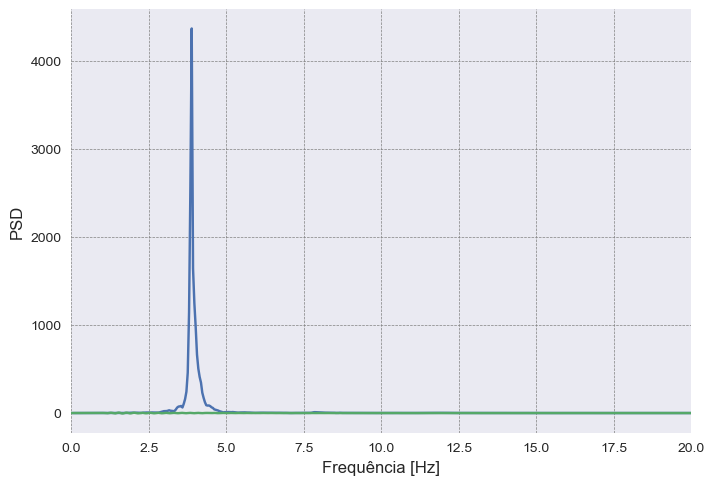

In [11]:
# filtrando o sinal, processo de denoising


threshold = 15                                  #limite 

indices= PSD>threshold
PSDclean= PSD*indices
fhat_clean= indices*fhat

ffi1t=np.fft.ifft(fhat_clean)                   # Transformada inversa de fourier, sinal filtrado

plt.plot(freq[L],PSD[L])

plt.xlabel('Frequência [Hz]', fontsize=12)
plt.ylabel('PSD', fontsize=12)
plt.grid(color='gray',linestyle='--',linewidth=0.5)
plt.plot(lista_sample,ffi1t)
plt.xlim(0,20)
    
plt.show()

C:\Users\Desktop\AppData\Local\Temp\ipykernel_17240\1356505772.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


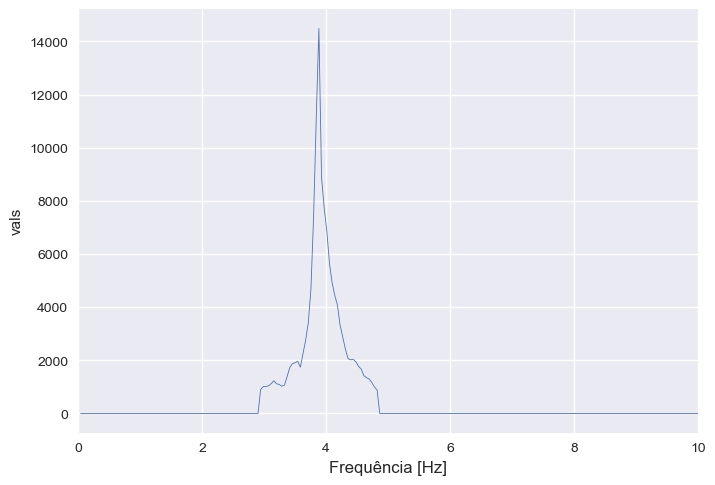

In [12]:
# Figura 4: fft após o processo de denoissing

fig, axs = plt.subplots( sharex=True)

plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 18})
plt.style.use('seaborn')

axs.set_xlim(0.0, 10)
axs.set_ylabel('vals')
plt.xlabel('Frequência [Hz]', fontsize=12)


axs.plot(freq[L],np.abs(fhat_clean[L]), lw= 0.6)
plt.show()

c:\Users\Desktop\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


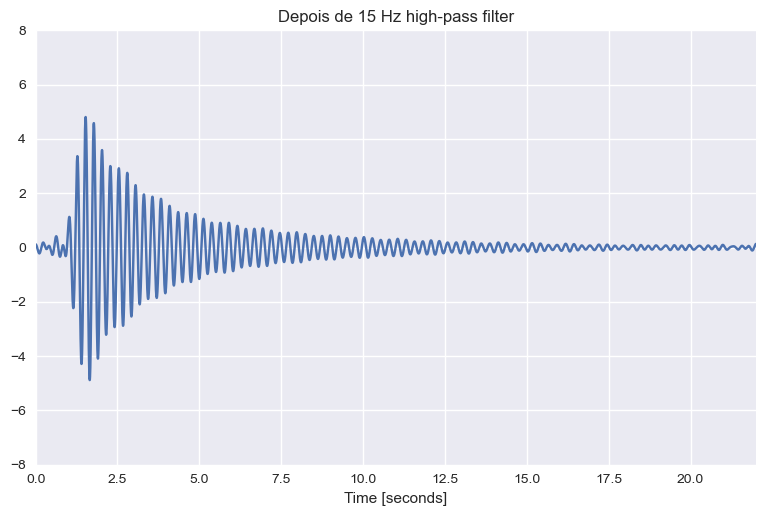

In [13]:
#Figura 5 : sinal no tempo apos a trasnformada inversa de fourier
fig, axs = plt.subplots( sharex=True)

axs.plot(lista_sample, ffi1t)
axs.set_title('Depois de 15 Hz high-pass filter')
axs.axis([0, 22, -8, 8])
axs.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

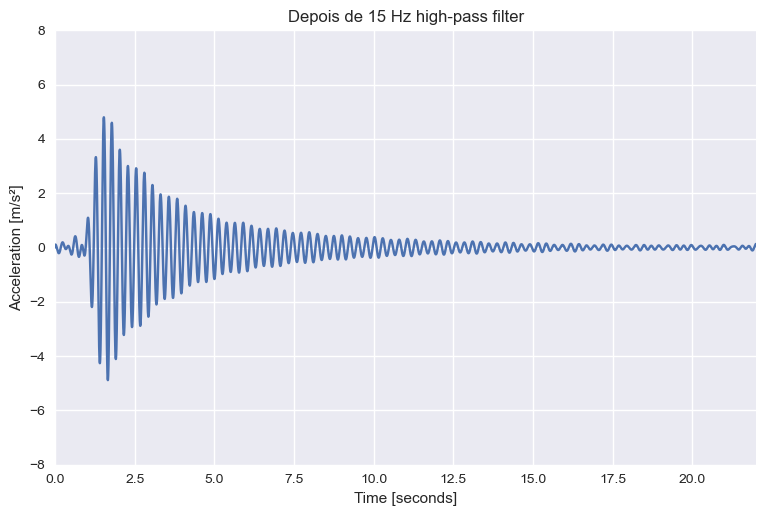

In [14]:
#Figura 6 : Filtro passa banda

#Função que filtra a série de aceleração

sos=signal.butter(1,[0.2,50],'bandpass',analog=False,fs=fs,output='sos') # N (2**n), Wn(frequencia critica), btype=lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop, analog=False, output='sos', fs=1/delta
ffi1t_clean = signal.sosfilt(sos, ffi1t)  

#figura apos o filtro passa alta

fig, axs = plt.subplots( sharex=True)

axs.plot(lista_sample, ffi1t_clean)
axs.set_title('Depois de 15 Hz high-pass filter')
axs.axis([0, 22, -8, 8])
axs.set_xlabel('Time [seconds]')
axs.set_ylabel('Acceleration [m/s²]')
plt.tight_layout()
plt.show()

c:\Users\Desktop\anaconda3\Lib\site-packages\numpy\lib\histograms.py:839: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
c:\Users\Desktop\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:6793: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16


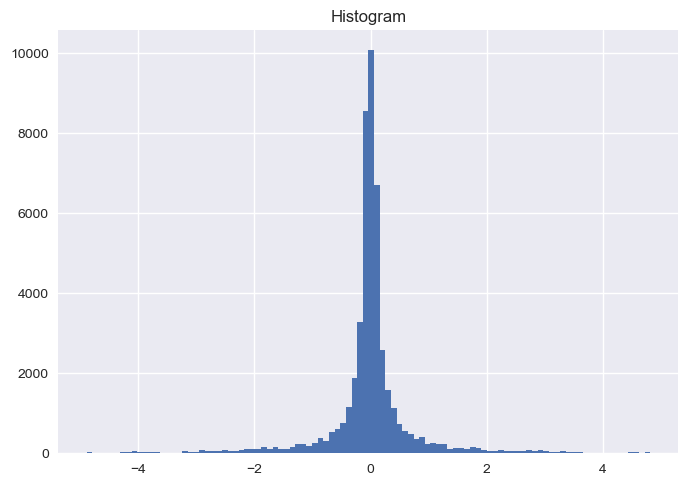

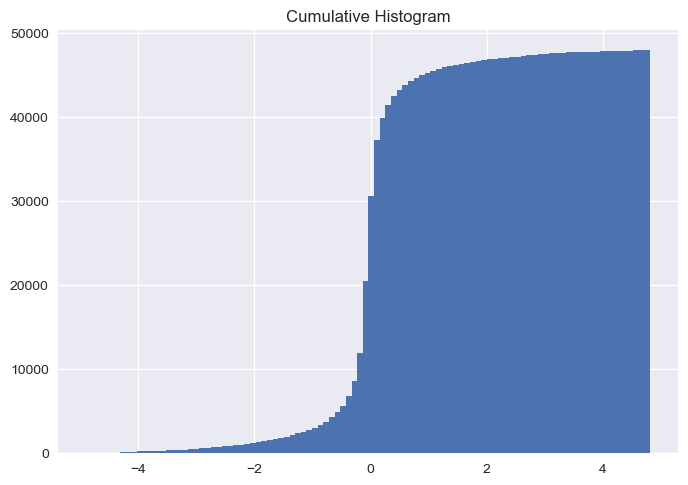

In [15]:
#Figura 6.1 : histograma

plt.hist(ffi1t, bins=100)
plt.title("Histogram")
plt.show()

plt.hist(ffi1t, cumulative=True, bins=100)
plt.title("Cumulative Histogram")
plt.show()

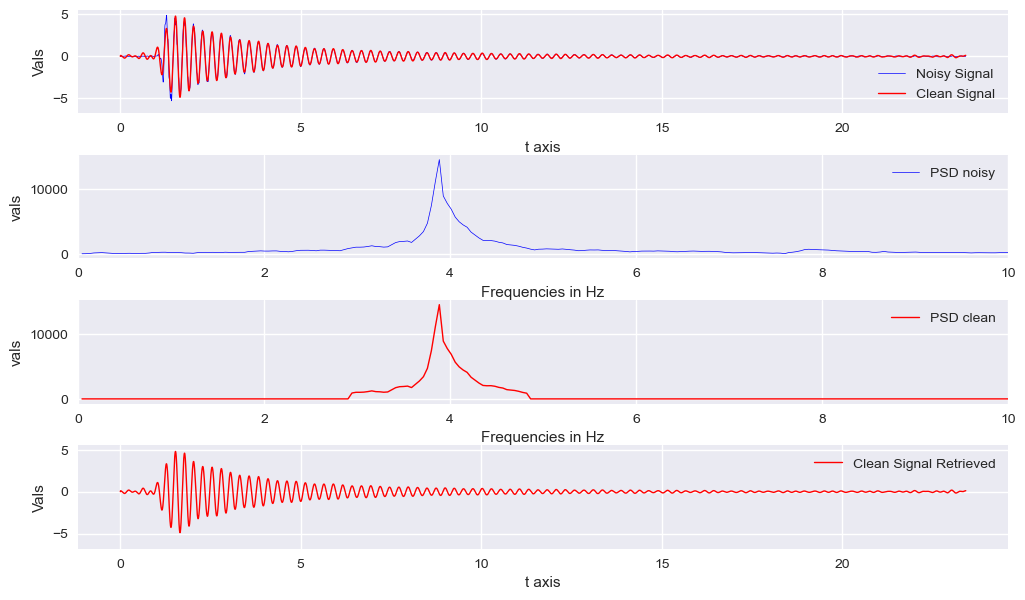

In [16]:
#Figura 7 : raw signal, fft, fft pos psd, clean signal

fig, ax = plt.subplots(4,1, figsize=(12,7))
ax[0].plot(lista_sample, lista_data_clean, color='b', lw=0.5, label='Noisy Signal')# apos aplicar algum filtro incluir no signal_clean
ax[0].plot(lista_sample, ffi1t_clean, color='r', lw=1, label='Clean Signal') 
ax[0].set_ylim([lista_data_min, lista_data_max])
ax[0].set_xlabel('t axis')
ax[0].set_ylabel('Vals')
ax[0].legend()

ax[1].plot(freq[L],np.abs(fhat[L]), color='b', lw=0.5, label='PSD noisy') #módulo do psd = funcao abs
ax[1].set_xlabel('Frequencies in Hz')
ax[1].set_ylabel('vals')
ax[1].legend()
ax[1].set_xlim(0.0, 10)

ax[2].plot(freq[L],np.abs(fhat_clean[L]), color='r', lw=1, label='PSD clean')
ax[2].set_xlabel('Frequencies in Hz')
ax[2].set_ylabel('vals')
ax[2].legend()
ax[2].set_xlim(0.0, 10)

ax[3].plot(lista_sample, ffi1t_clean, color='r', lw=1, label='Clean Signal Retrieved')
ax[3].set_ylim([lista_data_min, lista_data_max])
ax[3].set_xlabel('t axis')
ax[3].set_ylabel('Vals')
ax[3].legend()

plt.subplots_adjust(hspace=0.4)
plt.savefig('signal-analysis.png', bbox_inches='tight', dpi=300)

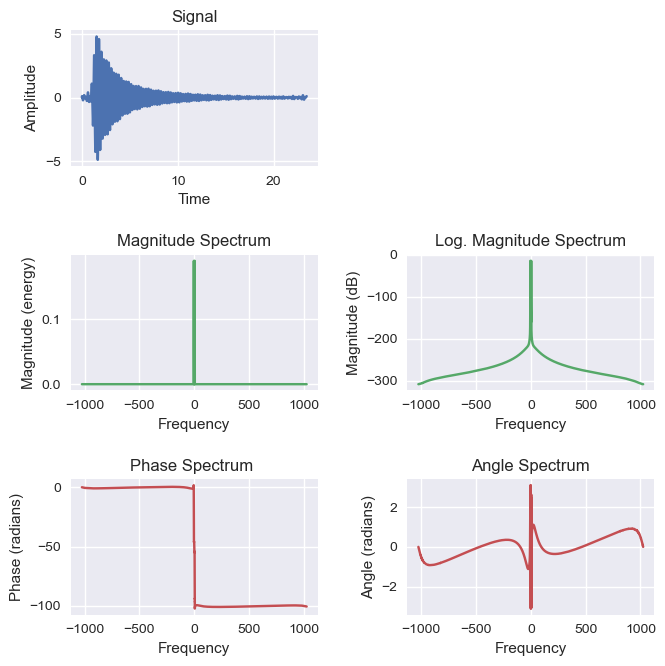

In [17]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))

# plot time signal:
axs[0, 0].set_title("Signal")
axs[0, 0].plot(lista_sample, ffi1t_clean, color='C0')
axs[0, 0].set_xlabel("Time")
axs[0, 0].set_ylabel("Amplitude")

# plot different spectrum types:
axs[1, 0].set_title("Magnitude Spectrum")
axs[1, 0].magnitude_spectrum(ffi1t_clean, Fs=fs, color='C1')

axs[1, 1].set_title("Log. Magnitude Spectrum")
axs[1, 1].magnitude_spectrum(ffi1t_clean, Fs=fs, scale='dB', color='C1')

axs[2, 0].set_title("Phase Spectrum ")
axs[2, 0].phase_spectrum(ffi1t_clean, Fs=fs, color='C2')

axs[2, 1].set_title("Angle Spectrum")
axs[2, 1].angle_spectrum(ffi1t_clean, Fs=fs, color='C2')

axs[0, 1].remove()  # don't display empty ax

fig.tight_layout()
plt.show()

## Integrando as séries temporais. velocidade e posição

In [31]:
# Função que integra a série de aceleração em velocidade

serie_data_clean = []

for i in range(len(ffi1t)):
    
    serie_data_clean.append([serie_data[i][0], ffi1t[i]])

lista_v = integrate.cumulative_trapezoid(lista_data_clean, lista_sample, initial=0) 
lista_v = polynomial(lista_v, order=20, plot=False)                                      # função necessária para remover a tendencia após a integração
#len(lista_v)



C:\Users\Desktop\AppData\Local\Temp\ipykernel_17240\4282665583.py:10: RankWarning: Polyfit may be poorly conditioned
  lista_v = polynomial(lista_v, order=20, plot=False)                                      # função necessária para remover a tendencia após a integração


In [32]:
# Função que integra a série de velocidade em posição

serie_v = []

for i in range(len(lista_v)):
    
    serie_v.append([serie_data[i][0], lista_v[i]])

lista_pos = integrate.cumulative_trapezoid(lista_v, lista_sample, initial=0)
#lista_pos = signal.detrend(lista_pos,)                              # função necessária para remover a tendencia após a integração
#len(lista_v)
    

c:\Users\Desktop\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


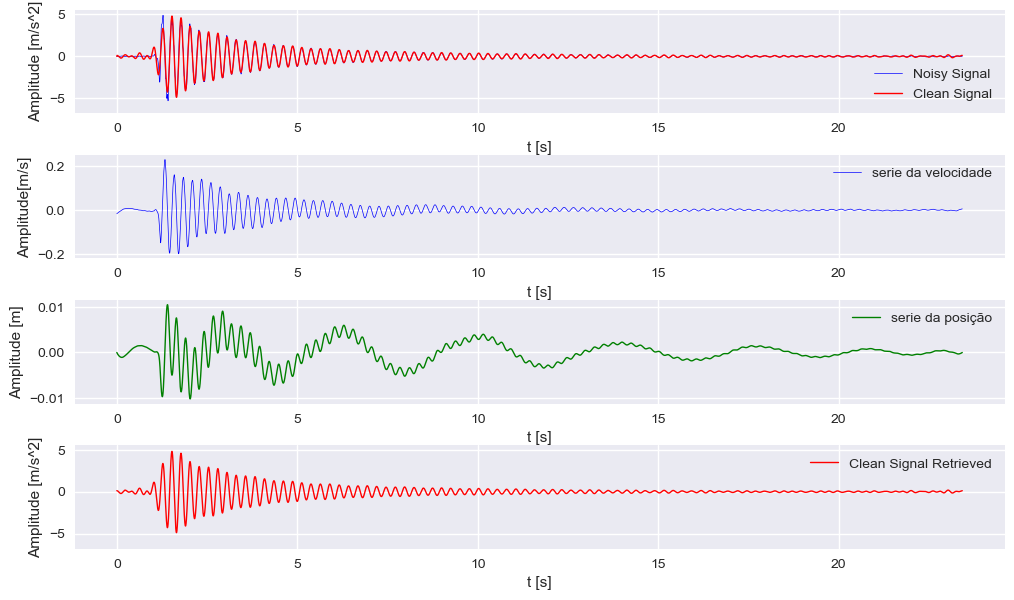

In [34]:
## Figura 8 : raw signal, veloc, pos, clean signal

fig, ax = plt.subplots(4,1, figsize=(12,7))
ax[0].plot(lista_sample, lista_data_clean, color='b', lw=0.5, label='Noisy Signal')# apos aplicar algum filtro incluir no signal_clean
ax[0].plot(lista_sample, ffi1t_clean, color='r', lw=1, label='Clean Signal') 
ax[0].set_ylim([lista_data_min, lista_data_max])
ax[0].set_xlabel('t [s]')
ax[0].set_ylabel('Amplitude [m/s^2]')
ax[0].legend()

ax[1].plot(lista_sample, lista_v, color='b', lw=0.5, label='serie da velocidade') 
ax[1].set_xlabel('t [s]')
ax[1].set_ylabel('Amplitude[m/s]')
ax[1].legend()

ax[2].plot(lista_sample,lista_pos, color='g', lw=1, label='serie da posição')
ax[2].set_xlabel('t [s]')
ax[2].set_ylabel('Amplitude [m]')
ax[2].legend()

ax[3].plot(lista_sample, ffi1t, color='r', lw=1, label='Clean Signal Retrieved')
ax[3].set_ylim([lista_data_min, lista_data_max])
ax[3].set_xlabel('t [s]')
ax[3].set_ylabel('Amplitude [m/s^2]')
ax[3].legend()

plt.subplots_adjust(hspace=0.4)
plt.savefig('signal-analysis.png', bbox_inches='tight', dpi=300)

## zerocrossing e funcao loc-dec

In [ ]:
#A curva de zero-crossing é uma técnica simples e eficaz para estimar a frequência natural amortecida de 
#um sinal oscilante amortecido. No entanto, a técnica é sensível ao ruído no sinal.

#Aqui estão alguns exemplos de como a curva de zero-crossing pode ser usada para estimar a frequência natural amortecida:

#Em engenharia mecânica, a curva de zero-crossing pode ser usada para estimar a frequência natural de vibração de uma estrutura.
#Em engenharia elétrica, a curva de zero-crossing pode ser usada para estimar a frequência natural de oscilação de um circuito.
#Em medicina, a curva de zero-crossing pode ser usada para estimar a frequência natural de batimentos cardíacos.#

In [ ]:
# Encontrando os pontos de cruzamento zero
zero_crossings = np.where(np.diff(np.sign(ffi1t_clean)) != 0)[0]

# Exibindo os pontos de cruzamento zero
#print(zero_crossings)

In [ ]:
# correlacionado os momentos dos zeros na lista de instantes e sinais

zeros_sample = []
for i in range(len(zero_crossings)):
    a = zero_crossings[i]
    zeros_sample.append(lista_sample[a]) 

zeros_data = []
for i in range(len(zero_crossings)):
    a = zero_crossings[i]
    zeros_data.append(ffi1t_clean[a]) 



In [ ]:
#tpeak 1 - tpeak 2 = T
#descrescimento = peakt 1 - peakt 2 = 
#zeta = det 


In [ ]:
# Encontrando os valores de pico

peaks = signal.find_peaks(ffi1t_clean)
peaks = list(peaks)
peaks.pop(1)
type(peaks[0])

# passando para uma lista em float

peaks_1 = peaks[0].tolist()
#peaks_1 





c:\Users\Desktop\anaconda3\Lib\site-packages\scipy\signal\_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


In [ ]:
# correlacionado os momentos dos picos na lista de instantes e sinais

peak_sample = []
for i in range(len(peaks_1)):
    a = peaks_1[i]
    peak_sample.append(lista_sample[a]) 

peak_data = []
for i in range(len(peaks_1)):
    a = peaks_1[i]
    peak_data.append(ffi1t_clean[a]) 

In [ ]:
# Estimando a frequência natural amortecida e o fator de amortecimento a partir dos zero crossings

# O período T é a diferenca entre 2 picos 
# utilizando a função zero crossing as distancia entre 2 zeros é metade de um período

T_1 = peak_sample[10]-peak_sample[9]
T_2 = peak_sample[11]-peak_sample[10]
T_3 = peak_sample[12]-peak_sample[11]

T = (T_1+T_2+T_3)/3                                         #período
print('O período é : {} [s].' .format(T))

# Frequencia natural amortecida

f=1/T

w_d = 2*np.pi*f                                             # frequencia natural amortecida
print('Frequencia natural amortecida : {} [rad/s].' .format(w_d))

#delta é a divisao logarítimica entre 2 x(pico)(pico no tempo) 
# utilizando a função zero crossing as distancia entre 2 zeros é metade de um período

d_f_1 = np.log(peak_data[10])/np.log(peak_data[9])
d_f_2 = np.log(peak_data[11])/np.log(peak_data[10])
d_f_3 = np.log(peak_data[12])/np.log(peak_data[11])

d_f = (d_f_1+d_f_2+d_f_3)/3                                 #delta

#Fator de amortecimento, zeta

zeta =  d_f/((4*(np.pi**2) * (d_f**2))**0.5)

if zeta==1 :
    print('Fator de amortecimento: {}. sinal criticamente amortecido' .format(zeta))
    print('O movimento descrito é um movimento harmônico amortecido de frenquencia angular, porém devido sua exponencial negativa, a amplitude diminui com o tempo.')

elif zeta > 1:
    print('Fator de amortecimento: {}. sinal superamortecido' .format(zeta))
    print('A equação mostra que o movimento é aperiódico, independente das condições iniciais impostas ao sistema. Visto que as raízes sao ambas negativas, o movimento diminui exponencialmente com o tempo.')

else :
    print('Fator de amortecimento: {}. sinal subamortecido' .format(zeta))
    print('O movimento descrito é um movimento harmônico amortecido de frenquencia angular, porém devido sua exponencial negativa, a amplitude diminui com o tempo.')


#Frequencia natural

w_n= w_d/((1-zeta**2)**0.5)
print('Frequencia natural: {} [rad/s].' .format(w_n))


O período é : 0.2568506666666666 [s].
Frequencia natural amortecida : 24.4624060693357 [rad/s].
Fator de amortecimento: (0.15915494309189535+2.6476660170757477e-34j). sinal subamortecido
O movimento descrito é um movimento harmônico amortecido de frenquencia angular, porém devido sua exponencial negativa, a amplitude diminui com o tempo.
Frequencia natural: (24.778238996031067+1.0712634891147503e-33j) [rad/s].


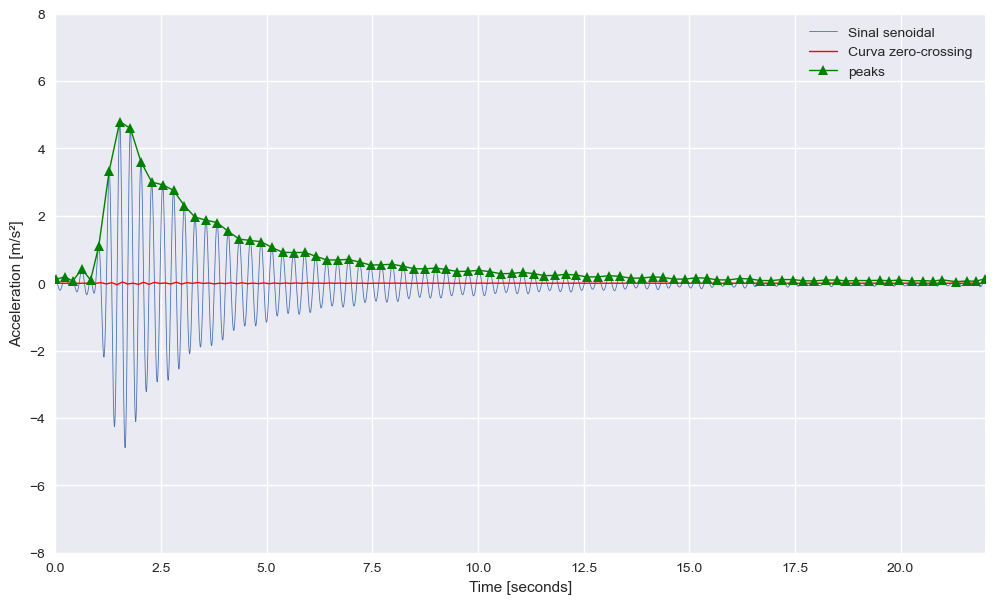

In [ ]:
# Figura 9 : sinal filtrado com os picos e os zeros destacados

fig, axs = plt.subplots(figsize=(12,7), sharex=True)
axs.plot(lista_sample, ffi1t_clean, label='Sinal senoidal', lw=0.6)
axs.plot(zeros_sample,zeros_data, 'r', label='Curva zero-crossing', lw=1)
axs.plot(peak_sample,peak_data, 'g-^', label='peaks', lw=1)
axs.axis([0, 22, -8, 8])
axs.set_xlabel('Time [seconds]')
axs.set_ylabel('Acceleration [m/s²]')
#axs.plot(lista_sample[peaks], ffi1t_clean[peaks], 'ro', label='Curva zero-crossing')
plt.legend()
plt.show()

## Médias

In [ ]:
# RMS = 1/n*(s_1**-s_2**)

rms_sample = []

for i in range(len(ffi1t_clean)-1):

    if i < len(ffi1t_clean):
        rms_sample.append((ffi1t_clean[i])**2 + (ffi1t_clean[i+1])**2)
        
    else:
        rms_sample.append(ffi1t_clean[i]**2+ffi1t_clean[i]**2)

rms_sample= [(i/sample)**0.5 for i in rms_sample]

In [ ]:
len(rms_sample)

47999

In [ ]:
# Assimetria = ((1/T)*(s_1-s_2)**3)**(1/3) ... T é o periodo

sk_sample = []

for i in range(len(ffi1t_clean)-1):

    if i < len(ffi1t_clean):
        sk_sample.append((ffi1t_clean[i]- ffi1t_clean[i+1])**3)
        
    else:
        sk_sample.append((ffi1t_clean[i]- ffi1t_clean[i+1])**3)
        
sk_sample= [(i/sample)**(1/3) for i in sk_sample]

In [ ]:
# Desvio padrão = ((sample-media)**2/len(sample))**(0.5) ... T é o periodo

dv_sample = []

media = sum(ffi1t_clean)/len(ffi1t_clean)

for i in range(len(ffi1t_clean)-1):

    if i < len(ffi1t_clean):
        dv_sample.append((ffi1t_clean[i]- media)**3)
        
    else:
        dv_sample.append((ffi1t_clean[i]- media)**3)
        
dv_sample= [(i/sample)**(0.5) for i in dv_sample]

In [ ]:
# curtose = (1/(dv**4 * T)*(s_1**4+s_2**4)) ... T é o periodo

k_sample = []

media_dv = sum(dv_sample)/len(dv_sample)

for i in range(len(ffi1t_clean)-1):

    if i < len(ffi1t_clean):
        k_sample.append((ffi1t_clean[i])**4 + (ffi1t_clean[i+1])**4)
        
    else:
        k_sample.append(ffi1t_clean[i]**4+ffi1t_clean[i]**4)

k_sample= [(i/(sample*(media_dv**4))) for i in k_sample]

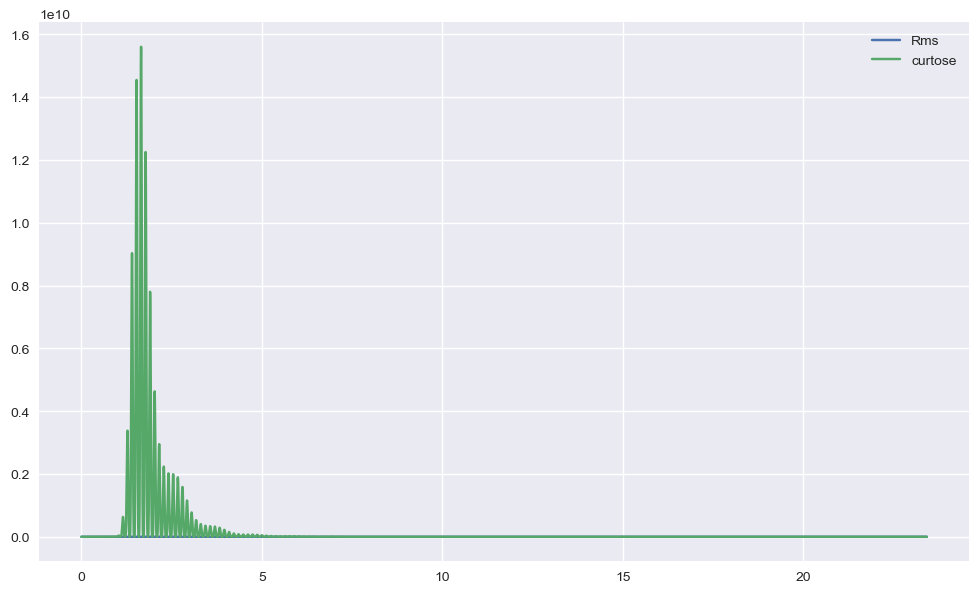

In [ ]:
# Figura 10 : Gráfico da RMS

fig, axs = plt.subplots(figsize=(12,7), sharex=True)
axs.plot(lista_sample[:len(rms_sample)], rms_sample, label='Rms')
#axs.plot(peak_sample,peak_data, 'g', label='peaks', lw=1)
#axs.plot(lista_sample[:len(sk_sample)], sk_sample, label='assimetria')
#axs.plot(lista_sample[:len(dv_sample)], dv_sample, label='desvio padrao')
axs.plot(lista_sample[:len(k_sample)], k_sample, label='curtose')


plt.legend()
plt.show()

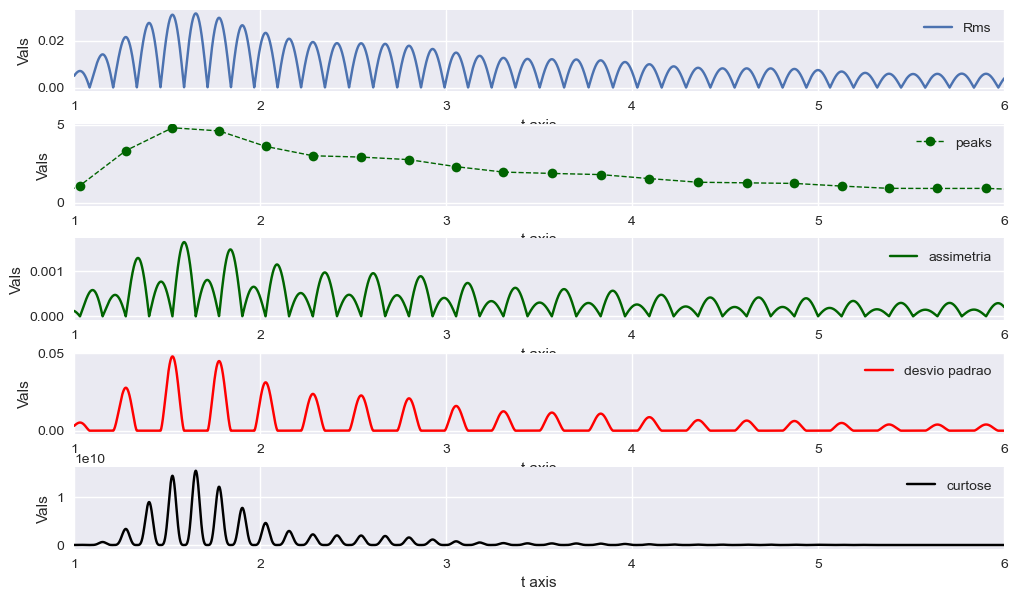

In [ ]:
## Figura 8 : raw signal, veloc, pos, clean signal

fig, ax = plt.subplots(5,1, figsize=(12,7))
ax[0].plot(lista_sample[:len(rms_sample)], rms_sample, label='Rms')
ax[0].set_xlabel('t axis')
ax[0].set_ylabel('Vals')
ax[0].set_xlim(1.0, 6)
ax[0].legend()

ax[1].plot(peak_sample,peak_data, 'o--', color='darkgreen', alpha=1, label='peaks', lw=1)
ax[1].set_xlabel('t axis')
ax[1].set_ylabel('Vals')
ax[1].set_xlim(1.0, 6)
ax[1].legend()

ax[2].plot(lista_sample[:len(sk_sample)], sk_sample, 'darkgreen', label='assimetria')
ax[2].set_xlabel('t axis')
ax[2].set_ylabel('Vals')
ax[2].set_xlim(1.0, 6)
ax[2].legend()

ax[3].plot(lista_sample[:len(dv_sample)], dv_sample, 'red', label='desvio padrao')
ax[3].set_xlabel('t axis')
ax[3].set_ylabel('Vals')
ax[3].set_xlim(1.0, 6)
ax[3].legend()

ax[4].plot(lista_sample[:len(k_sample)], k_sample,'black', label='curtose')
ax[4].set_xlabel('t axis')
ax[4].set_ylabel('Vals')
ax[4].set_xlim(1.0, 6)
ax[4].legend()

plt.subplots_adjust(hspace=0.4)
plt.savefig('signal-analysis.png', bbox_inches='tight', dpi=300)

## Funções que não funcionam

In [ ]:
#Função que integra a série de aceleração
def serie_v():
    dt=0.000488
    f=1/dt
    g_filtro=filtro()
    v_0=0
    g=9.81
    delta_t=0.000488
    serie_v=[[0,0]]
    for i in range(1,len(g_filtro)-1):
        if delta_t*i>0.5:
            v=g_filtro[i][1]*g*delta_t+serie_v[i-1][1]
            serie_v.append([delta_t*i,v])
        else:
            serie_v.append([delta_t*i,0])
    lista_y=[]
    for i in serie_v:
        lista_y.append(i[1])
    sos=signal.butter(10,[2,6],'bandpass',analog=False,fs=f,output='sos')
    filtered = signal.sosfilt(sos, lista_y)
    serie_v_f=[]
    for i in range(len(filtered)):
        serie_v_f.append([dt*i,filtered[i]])
    return serie_v_f

In [ ]:
#Função que filtra a série de aceleração
def filtro():
    dt=0.000488
    f=1/dt
    sos=signal.butter(10,[1,20],'bandpass',analog=False,fs=f,output='sos')
    lista_g=[]
    lista_t=[]
    for i in range(len(serie_g)):
        lista_g.append(serie_g[i][1])
        lista_t.append(i*dt)
    med_g=np.array(lista_g).mean()
    lista_gcor=[]
    for i in range(len(lista_g)):
        lista_gcor.append(lista_g[i]-med_g)
    filtered = signal.sosfilt(sos, lista_gcor)
    serie_g_f=[]
    for i in range(len(filtered)):
        serie_g_f.append([dt*i,filtered[i]])
    return serie_g_f



In [ ]:
#Função que integra a série de aceleração
def serie_v():
    dt=0.000488
    f=1/dt
    g_filtro=filtro()
    v_0=0
    g=9.81
    delta_t=0.000488
    serie_v=[[0,0]]
    for i in range(1,len(g_filtro)-1):
        if delta_t*i>0.5:
            v=g_filtro[i][1]*g*delta_t+serie_v[i-1][1]
            serie_v.append([delta_t*i,v])
        else:
            serie_v.append([delta_t*i,0])
    lista_y=[]
    for i in serie_v:
        lista_y.append(i[1])
    sos=signal.butter(10,[2,6],'bandpass',analog=False,fs=f,output='sos')
    filtered = signal.sosfilt(sos, lista_y)
    serie_v_f=[]
    for i in range(len(filtered)):
        serie_v_f.append([dt*i,filtered[i]])
    return serie_v_f
    


In [ ]:
#Função que integra a série de velocidade
def serie_d():
    dt=0.000488
    f=1/dt
    v=serie_v()
    delta_t=0.000488
    serie_d=[[0,0]]
    for i in range(1,len(v)-1):
        d=v[i][1]*delta_t+serie_d[i-1][1]
        serie_d.append([delta_t*i,d])
    lista_x=[]
    lista_y=[]
    for i in serie_d:
        lista_x.append(i[0])
        lista_y.append(i[1])
    med_d=np.array(lista_y).mean()
    lista_y_cor=[]
    for i in range(len(lista_y)):
        lista_y_cor.append(lista_y[i]-med_d)
    serie_d_cor=[]
    for i in range(len(lista_y_cor)):
        serie_d_cor.append([lista_x[i],lista_y_cor[i]])
    sos=signal.butter(10,[2,6],'bandpass',analog=False,fs=f,output='sos')
    filtered = signal.sosfilt(sos, lista_y)
    serie_d_f=[]
    for i in range(len(filtered)):
        serie_d_f.append([dt*i,filtered[i]])
    return serie_d_f
    
    


In [ ]:
#Função para plotar as séries temporais em um único gráfico.
def plot():
    g=filtro()
    vel=serie_v()
    desloc=serie_d()
    lista_t=[]
    lista_g=[]
    for i in g:
        lista_t.append(i[0])
        lista_g.append(i[1])
    plt.plot(lista_t,lista_g,color='orange',label='aceleração [g]',linewidth=1)
    lista_tv=[]
    lista_v=[]
    for j in vel:
        lista_tv.append(j[0])
        lista_v.append(j[1])
    plt.plot(lista_tv,lista_v,color='red',label='velocidade[m/s]',linewidth=2)
    lista_td=[]
    lista_d=[]
    for k in desloc:
        lista_td.append(k[0])
        lista_d.append(k[1])
    plt.plot(lista_td,lista_d,color='blue',label='deslocamento[m]',linewidth=1)
    plt.legend(loc="upper center",bbox_to_anchor=(0.5, 1.15),ncol=3)
    plt.ylabel('Aceleração [g]')
    plt.xlabel('Tempo [s]')
    plt.grid(color='gray',linestyle='--',linewidth=0.5)
    plt.show()



In [ ]:
#Função para plotar a curva de "zero-crossing" e calcular a frequência de oscilação
def zc():
    desloc=serie_d()
    z_c=[]
    lista_t=[]
    n_zc=0
    if desloc[0][1]>0:
        crit=1
    else:
        crit=-1
    for i in range(2,len(desloc)-2,1):
        crit_anterior=crit
        if desloc[i][1]>0:
            crit=1
        else:
            crit=-1
        if crit_anterior!=crit:
            n_zc=n_zc+1
            z_c.append(n_zc)
            lista_t.append(desloc[i][0])
            print([n_zc,desloc[i][0],desloc[i]])
    plt.plot(lista_t,z_c,color='black',label='zero-crossing',linewidth=1)
    plt.legend(loc="upper center",bbox_to_anchor=(0.5, 1.15),ncol=3)
    plt.ylabel('Nº eventos')
    plt.xlabel('Tempo [s]')
    plt.grid(color='gray',linestyle='--',linewidth=0.5)
    plt.show()
    print('A frequência é:'+str(0.5*((z_c[-1]-z_c[-100])/(lista_t[-1]-lista_t[-100]))))



            


#denoising()
#print(log_dec())
#plot()